<div><div style="text-align:left;display:inline-block;float:left"><code>Eduardo Cardenas</code></div> <div style="text-align:right;display:inline-block;float:right"><code>Computación Científica - UNMSM</code></div></div>
<hr width=100% align=center>
<h1 style="text-align:center">Método Numérico - Ecuación Hiporlica</h1>

Vamos aplicar el método numético para la ecuación de la onda :

$$
\begin{cases}
 \dfrac{\partial^2 u}{\partial t^2} = c^2 \dfrac{\partial^2 u}{\partial x^2} & \text{para } (x,t) \in (a,b)\times(0,T)\\ 
 {\scriptsize\mbox{ tal que}} & \\ 
 u(x,0) = f(x) & \text{para } x\in(a,b)    \\
 \dfrac{\partial u}{\partial t}(x,0) = g(x)  & \text{para } x\in(a,b) \\
 u(a,t) = 0 = u(b,t)  & \text{para } t\in(0,T)
\end{cases} 
$$

Denotamos la siguiente partición:
$$h = \frac{b-a}{m}, \qquad k = \frac{T}{n} \quad \mbox{tal que} \quad x_{i+1} = x_i + h, \qquad t_{j+1} = t_j + k $$

Utilizamos la siguiente notación :
$$ w_{i,j} = u(x_i,t_j) $$

## Fórmulas para aproximar las derivadas parciales

Utilizamos las siguientes formulas : 

$$ \frac{\partial^2 u}{\partial x^2} \simeq \frac{w_{i+1,j} -2w_{i,j} + w_{i-1,j}}{h^2}$$

$$ \frac{\partial^2 u}{\partial t^2} \simeq \frac{w_{i,j+1} -2w_{i,j} + w_{i,j-1}}{h^2}$$

## Ahora encontramos la formula para aproximar la solución

Conocidas las aproximaciones de las derivadas parciales , reemplazemos sus aproximaciones en la ecuación del calor y luego procederemos a encontrar una formula que nos permita aproximar $w_{i,j+1}$

$$\frac{w_{i,j+1} -2w_{i,j} + w_{i,j-1}}{k^2} \simeq c^2\frac{w_{i+1,j} -2w_{i,j} + w_{i-1,j}}{h^2}  $$

Sea $\lambda = \dfrac{c^2 k^2}{h^2}  $ : 

$$ w_{i,j+1} - 2w_{i,j} + w_{i,j-1} \simeq \lambda w_{i+1,j} - 2\lambda w_{i,j} + \lambda w_{i-1,j}$$

$$w_{i,j+1} = \lambda w_{i-1,j} + 2(1-\lambda)w_{i,j} + \lambda w_{i+1,j} - w_{i,j-1} $$

Escribiendo esta formula matricialmente obtenemos : 

$$ 
\left( \begin{array}{c}
        w_{1,j+1}  \\
        w_{2,j+1}  \\
        w_{3,j+1}  \\
        \vdots   \\
        w_{m-1,j+1}\\
       \end{array}
\right)  = \left( \begin{array}{ccccc}
        2(1-\lambda) & \lambda    & 0          & \cdots  & 0          \\
        \lambda    & 2(1-\lambda) & \lambda    & \cdots  & 0          \\
        0          & \lambda    & 2(1-\lambda) & \cdots  & 0          \\
        \vdots     & \vdots     & \vdots     & \ddots  & \lambda   \\
        0          & 0          & 0          & \lambda & 2(1-\lambda) \\        
        \end{array}
\right) \left( \begin{array}{c}
       w_{1,j}  \\
       w_{2,j}  \\
       w_{3,j}  \\
       \vdots     \\
       w_{m-1,j}\\
       \end{array}
\right) - \left( \begin{array}{c}
       w_{1,j-1}  \\
       w_{2,j-1}  \\
       w_{3,j-1}  \\
       \vdots     \\
       w_{m-1,j-1}\\
       \end{array}
\right)       
$$

$$w^{(j+1)} = Aw^{(j)} - w^{(j-1)} \quad \mbox{ para } \quad j=1,2,3,...,n-1$$  

Sabiendo que :

$$ w^{(0)} = \left( \begin{array}{c}
       w_{1,j}  \\
       w_{2,j}  \\
       w_{3,j}  \\
       \vdots     \\
       w_{m-1,j}\\
       \end{array}
\right) = \left( \begin{array}{c}
       f(x_1)  \\
       f(x_2)  \\
       f(x_3)  \\
       \vdots     \\
       f(x_{m-1})\\
       \end{array}
\right) $$

Para encontrar $w^{(1)}$ podemos utilizar dos formulas :

**Primera fórmula**

$$w_{i,1} = f(x_i) + kg(x_i)$$

**Segunda fórmula**

$$w_{i,1} = \dfrac{\lambda}{2}f(x_{i-1}) + (1-\lambda)f(x_i) + \dfrac{\lambda}{2}f(x_{i+1}) + kg(x_i)$$

## Codigo Python

In [4]:
import numpy as np

def tridiag(a,b,c,N):
    A = np.zeros((N,N))
    
    np.fill_diagonal(A[:-1,1:],a)
    np.fill_diagonal(A,b)
    np.fill_diagonal(A[1:,:-1],c)
    
    return A

def metodoHiperbolica(c, L, T, h, k, f, g, a, b):
     
    r = (c*k**2)/h**2
    n = round(T/k) + 1
    m = round(L/h) + 1

    x = np.linspace(0,L,m)
    
    sol = np.zeros((n,m))

    sol[0] = f(x)
    #primera forma
    #sol[1] = f(x) + k*g(x)

    #segunda forma
    for j in range(1,m-1):
        sol[1,j] = (1-r)*f(x[j]) + (r/2)*f(x[j+1]) + (r/2)*f(x[j-1]) + k*g(x[j])

    sol[:,0] = a(0)
    sol[:,-1] = b(L)

    A = tridiag(r, 2-2*r, r, m-2)

    for i in range(1,n-1):
        sol[i+1,1:-1] = np.dot(A, sol[i,1:-1]) - sol[i-1,1:-1]
        sol[i+1,1] += r*sol[i,0]
        sol[i+1,-2] += r*sol[i,-1]
        
    return sol

## Ejercicio

Aproximar la solución de la sigueinte ecuación de onda :

$$
\begin{cases}
 \dfrac{\partial^2 u}{\partial t^2} = 4 \dfrac{\partial^2 u}{\partial x^2} & \text{para } (x,t) \in (0,1)\times(0,T)\\ 
 {\scriptsize\mbox{ tal que}} & \\ 
 u(x,0) = \sin(\pi x) & \text{para } x\in(0,1)    \\
 \dfrac{\partial u}{\partial t}(x,0) = 0  & \text{para } x\in(0,1) \\
 u(0,t) = 0 = u(1,t)  & \text{para } t\in(0,T)
\end{cases} 
$$

usando $h = 0.1$ y $k = 0.05$ .

### Solución

In [13]:
sol_aprox = metodoHiperbolica(4, 1, 1, 0.1, 0.05, lambda x: np.sin(np.pi*x), lambda x: 0, lambda x: 0, lambda x: 0)

Con la solución hallada veamos como se comporta la ecuación de la onda , que representa el movimiento de una cuerda, al transcurrir del tiempo.

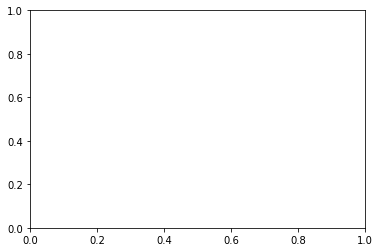

In [17]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('animation', html='jshtml')
from matplotlib import animation

fig = plt.figure()
ax = fig.add_subplot(111)

x = np.linspace(0, 1, 11)
t = np.linspace(0, 1, 21)

In [18]:
def init():
  ax.plot([], [])
  ax.grid()
  ax.set_ylim(-2.0, 2.0)
  ax.set_ylabel("Altura")
  ax.set_xlabel("Posición en la cuerda")
  ax.set_title("Movimiento de la cuerda")

def animate(i):
  del ax.lines[:]
  ax.plot(x, sol_aprox[i], color="blue", label="aprox. $t = {0:.2f}$ seg.".format(t[i]))
  ax.legend()
  
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=21, interval=120, repeat=True)

anim